In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import numpy as np

# Load the iris dataset
data = load_iris()
df = data.data
target = data.target
feature_names = data.feature_names

# Extract Sepal Length and Sepal Width
sepal_length_width = df[:, :2]

Show dendrogram of the iris data using hierarchical clustering using the ward method.

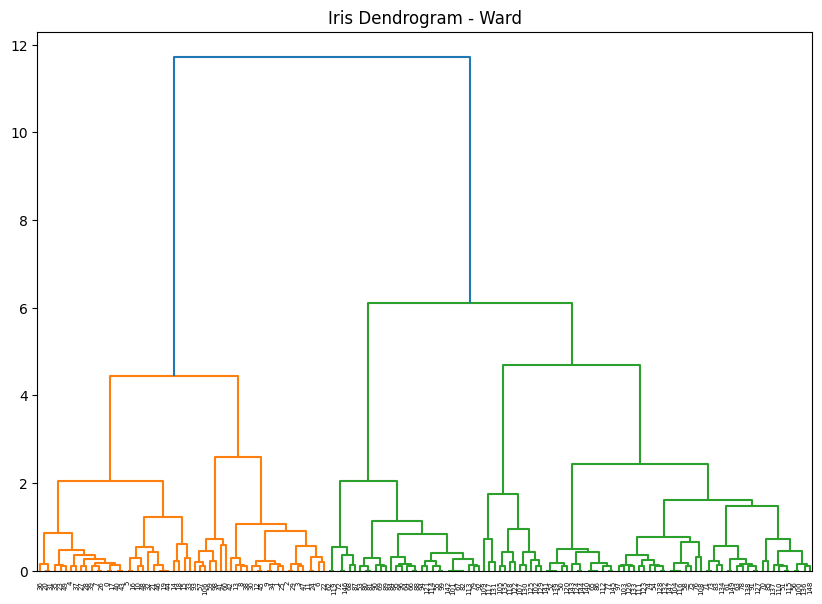

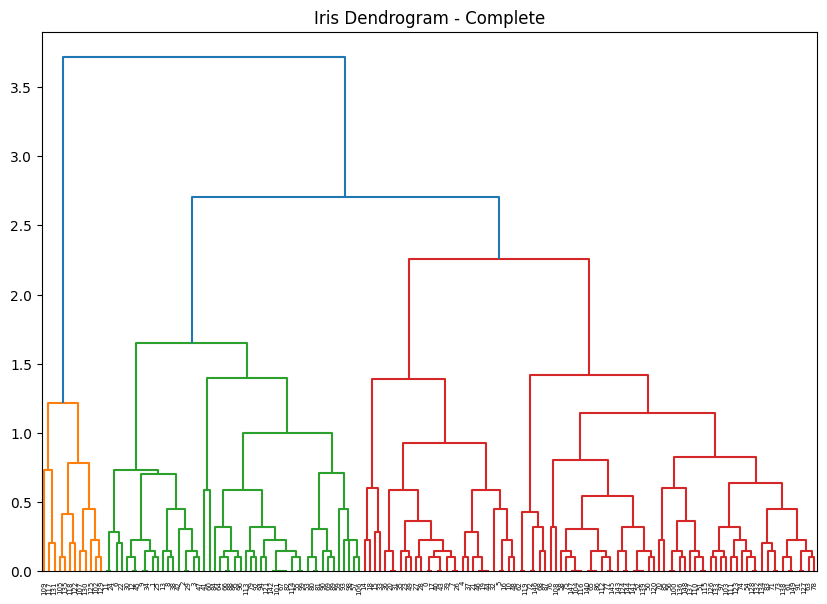

In [23]:
# Dendrogram using ward method
plt.figure(figsize=(10, 7))
plt.title("Iris Dendrogram - Ward")
dend_ward = shc.dendrogram(shc.linkage(sepal_length_width, method='ward'))
plt.show()

# Dendrogram using complete method
plt.figure(figsize=(10, 7))
plt.title("Iris Dendrogram - Complete")
dend_complete = shc.dendrogram(shc.linkage(sepal_length_width, method='complete'))
plt.show()

Scatter plots of the data in 2d showing the clusters in different colors using Agglomerative Clustering for different k values. Show the plots side by side for ward and complete linkage.


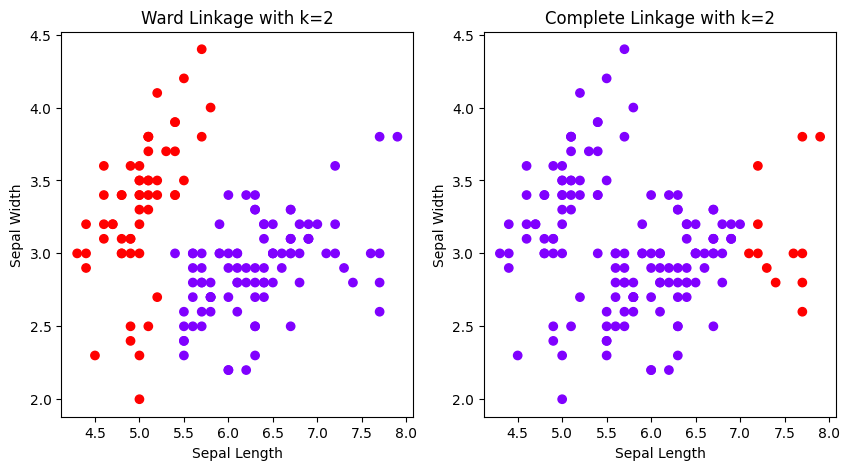

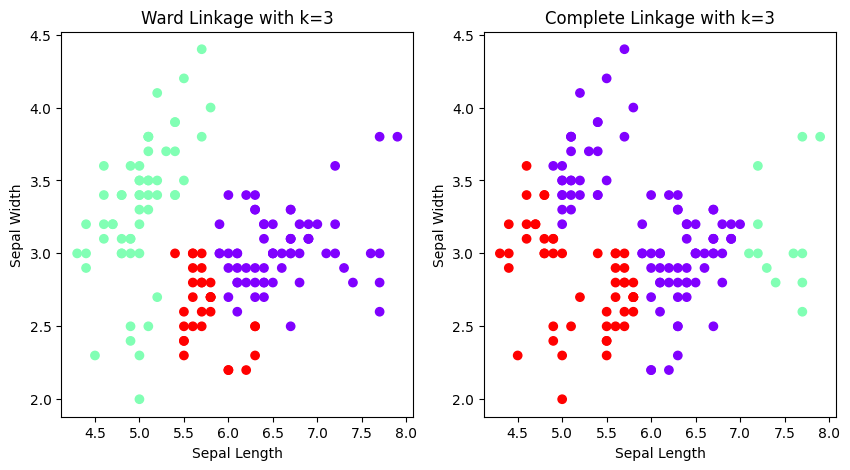

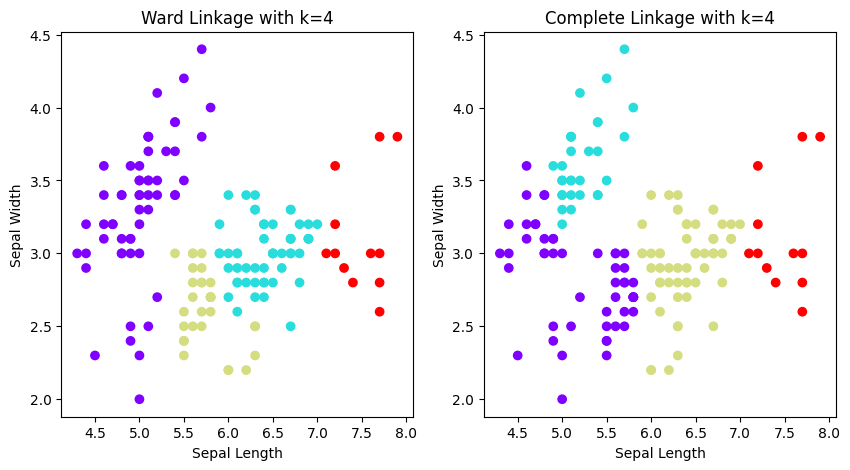

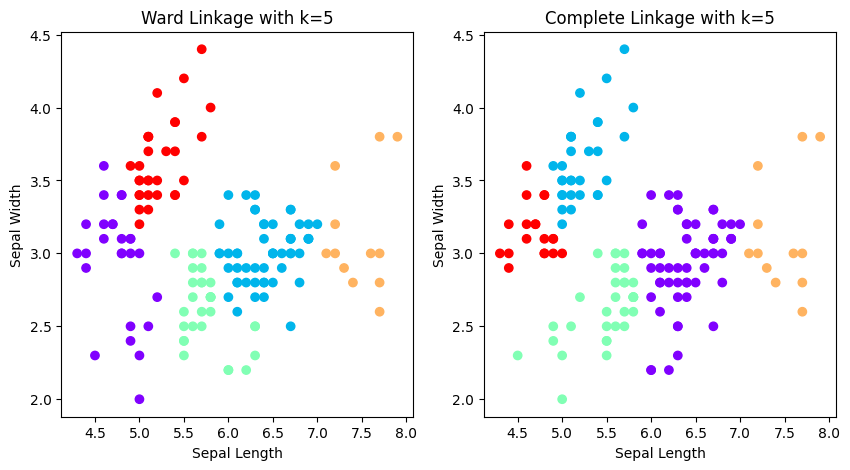

In [20]:
# Define k values
k_values = [2, 3, 4, 5]

# Agglomerative Clustering for different k values using ward and complete linkage
for k in k_values:
    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Agglomerative Clustering with ward linkage
    cluster_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_ward = cluster_ward.fit_predict(sepal_length_width)
    axes[0].scatter(sepal_length_width[:, 0], sepal_length_width[:, 1], c=labels_ward, cmap='rainbow')
    axes[0].set_title(f'Ward Linkage with k={k}')
    axes[0].set_xlabel('Sepal Length')
    axes[0].set_ylabel('Sepal Width')
    
    # Agglomerative Clustering with complete linkage
    cluster_complete = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels_complete = cluster_complete.fit_predict(sepal_length_width)
    axes[1].scatter(sepal_length_width[:, 0], sepal_length_width[:, 1], c=labels_complete, cmap='rainbow')
    axes[1].set_title(f'Complete Linkage with k={k}')
    axes[1].set_xlabel('Sepal Length')
    axes[1].set_ylabel('Sepal Width')
    
    # Display the plot
    plt.show()


Scatter plot of the data in 2d showing the clusters in different colors using K-Means clustering for different k values. Also show the cluster centers in the plot

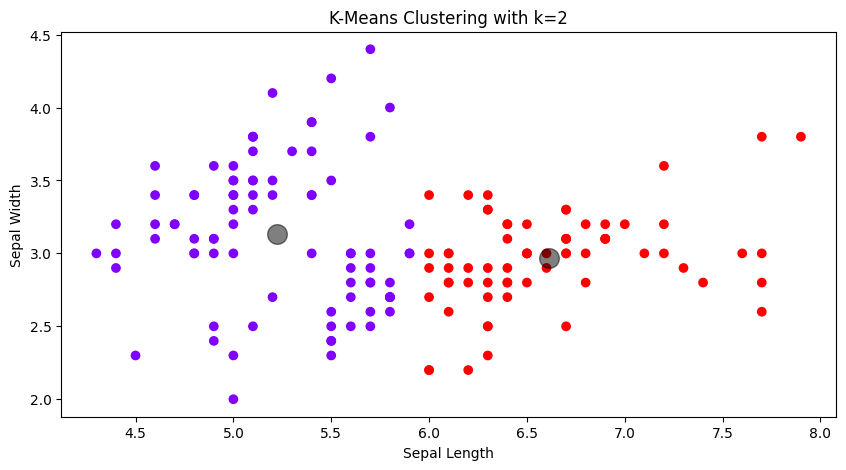

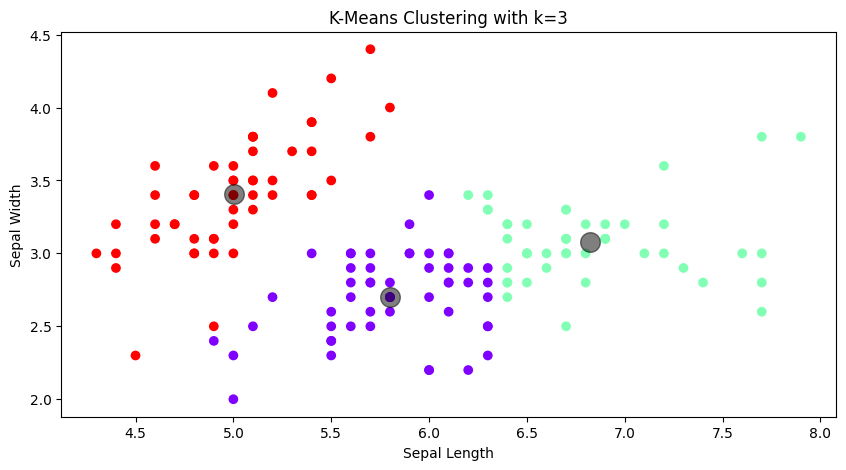

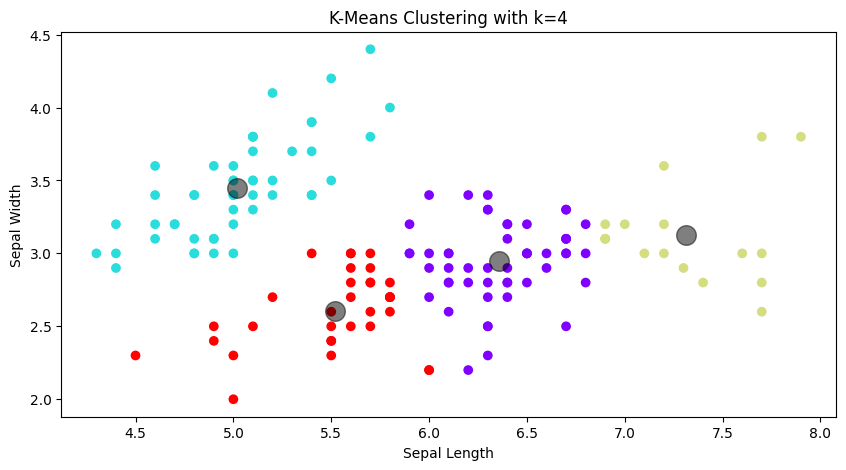

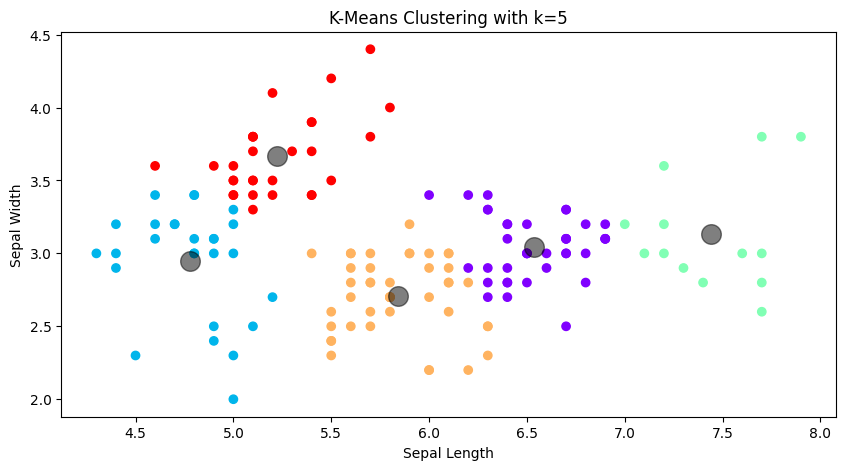

In [21]:
# K-Means Clustering for different k values
for k in k_values:
    # Create a subplot for each k value
    plt.figure(figsize=(10, 5))
    plt.title(f'K-Means Clustering with k={k}')
    
    # Perform the clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sepal_length_width)
    y_kmeans = kmeans.predict(sepal_length_width)
    
    # Plot the clusters
    plt.scatter(sepal_length_width[:, 0], sepal_length_width[:, 1], c=y_kmeans, cmap='rainbow')
    
    # Plot the centroids
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

Based on the provided dendrograms and scatter plots
1. **Logical Interpretation from Clusters:**
   - The scatter plots for both hierarchical clustering methods with \( k=2 \) show a clear distinction between two groups. However, as the number of clusters increases to \( k=4 \) and \( k=5 \), the clusters become less distinct.
   - The K-Means clustering with \( k=3 \) seems to align well with the known classification of the Iris dataset, which has three species. The clusters are well-separated and compact, which suggests good clustering performance.

2. **Comparison of Euclidean Distance and Complete Linkage:**
   - The dendrogram using the ward method (which employs the Euclidean distance) suggests two main clusters with a significant height difference indicating a strong distinction between them.
   - The complete linkage dendrogram and scatter plots, on the other hand, show a less distinct separation between clusters, especially as \( k \) increases. For \( k=2 \), complete linkage creates a cluster with a wide spread which may include more variance within the cluster compared to ward linkage.
   - In higher values of \( k \), the clusters from complete linkage seem to be more fragmented compared to those from ward linkage, which may indicate less cohesion within the clusters.

3. **Comparison of Agglomerative and K-Means Clustering Scatter Plots:**
   - The scatter plots from Agglomerative clustering with ward linkage tend to show more cohesive and compact clusters, especially for \( k=3 \), which is consistent with the natural grouping in the Iris dataset.
   - K-Means clustering scatter plots, particularly for \( k=3 \) and \( k=5 \), show distinct clusters with clear centroids. K-Means tends to create more spherical clusters due to the algorithm's tendency to minimize variance within clusters.
   - Comparing the scatter plots for \( k=2 \) in both methods, K-Means provides a clearer separation between clusters, which could be due to its centroid initialization and optimization approach.
   - For \( k=3 \), both methods perform similarly well in separating the clusters, but K-Means has a slight edge in terms of the compactness of the clusters.
   - For \( k=5 \), the K-Means clustering method begins to show some overlap and less clear distinctions between clusters, suggesting that \( k=3 \) might be a more appropriate choice for the number of clusters in this dataset.